<center><img src="Fig/ENSIMAG.png" width="30%" height="30%"></center>
<center><h3>Ensimag 2A</h3></center>
<hr>
<center><h1>Optimisation Numérique</h1></center>
<center><h2>TP: Algorithmes de descente de gradient et (quasi-) Newton</h2></center>

---

# Introduction

L'objectif de ce TP est de se familiariser avec les algorithmes d'optimisation numérique en codant deux algorithmes de base et en observant leur comportement sur deux fonctions simples.

---

L’ensemble d’un programme d'optimisation se présente en deux parties :
* *un simulateur :* il est chargé de calculer la fonction (ainsi que le gradient et éventuellement la Hessienne) en chaque point décidé par l’algorithme. Souvent, la fonction à minimiser n’est connue que via ce simulateur.
* *l’algorithme proprement dit :* il comporte dans notre cas deux boîtes principales correspondant au calcul de la direction, et au calcul du pas.

--- 
En pratique, nous allons séparer *simulateurs* et *partie algorithmique* de la manière suivante :
* `TP.ipynb`, le présent fichier, contiendra l'énoncé, les algorithmes développés, et sera l'environnement d'éxécution et d'affichage
* `sim_f1.ipynb` `sim_f2.ipynb` contiendront les simulateurs des fonctions étudiées.

Afin de pouvoir importer les simulateurs, sous la forme de *notebooks*, de la même manière que des scripts python, le script suivant est nécessaire. Aussi, à chaque modification des simulateurs, il est nécessaire de les recharger à l'aide de la fonction `reload`.

In [1]:
import start
from imp import reload

**Example d'import d'un simulateur :** 

In [2]:
import sim_f1 as f1
reload(f1)

importing notebook from sim_f1.ipynb
importing notebook from sim_f1.ipynb


<module 'sim_f1' from 'sim_f1.ipynb'>

---

## Exercice 1.  Simulateurs

> Ecrire dans les fichiers respectifs `sim_f1.ipynb` et `sim_f2.ipynb`  un simulateur pour les fonctions suivantes :
> $$\begin{array}{rl} f_1(x) =& \sum_{k=1}^n k x_k^2 ~~~ \text{ pour }  x\in\mathbb{R}^n\\ f_2(x) =& (1-x_1)^2 + 100(x_2-x_1^2)^2 ~~~ \text{ pour }  x=(x_1,x_2)\in\mathbb{R}^2\end{array}$$ 

<!-- > Donner les minima globaux de ces deux fonctions.-->

Le format du simulateur doit etre

In [3]:
def sim(x):
    # Calcul de la valeur de la fonction et de son gradient en x
    return f,g

avec `x` la valeur de la variable pour laquelle il faut évaluer $f$ et son gradient, `f` qui vaut $f(x)$ et `g` qui vaut $\nabla f(x)$.  

## Exercice 2.  Lignes de niveaux et plot 3D

> Visualiser la géométrie des lignes de niveaux ainsi que le tracé 3D de la fonction pour $f_1$ avec $n=2$ et $f_2$ à l'aide des fonctions `level_plot` and `custom_3dplot`. Les paramètres de ces tracés peuvent être changés dans les fichiers des simulateurs respectifs. Discuter la convexité des deux fonctions.

#### Fonction $f_1$

importing notebook from sim_f1.ipynb


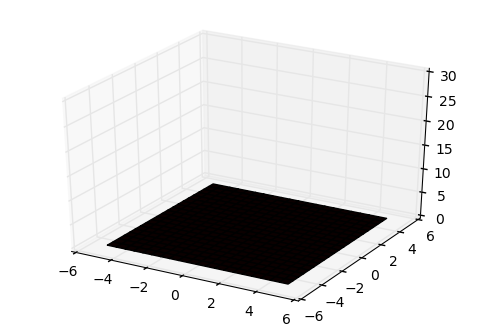

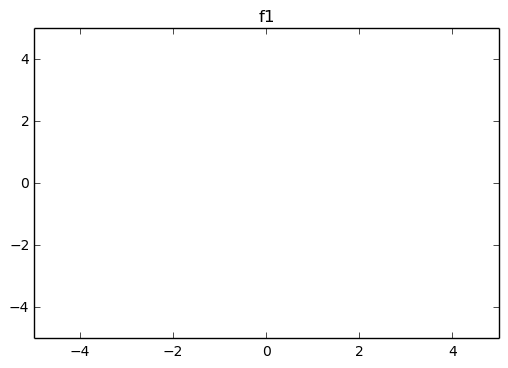

In [4]:
from plotLib import *
%matplotlib inline

import sim_f1 as f1
reload(f1)


custom_3dplot( f1.sim, f1.x1_min,f1.x1_max,f1.x2_min,f1.x2_max,f1.nb_points, f1.vmin, f1.vmax )
level_plot( f1.sim, f1.x1_min,f1.x1_max,f1.x2_min,f1.x2_max,f1.nb_points, f1.levels , f1.title )

#### Fonction $f_2$

importing notebook from sim_f2.ipynb
importing notebook from sim_f2.ipynb


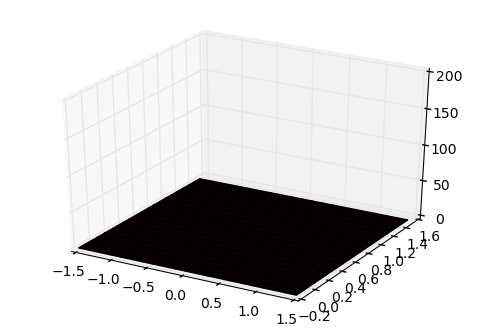

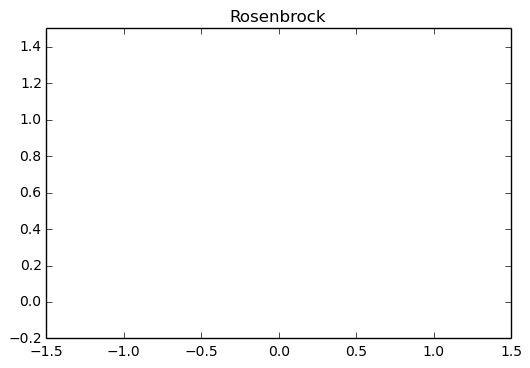

In [5]:
from plotLib import *
%matplotlib inline

import sim_f2 as f2
reload(f2)


custom_3dplot( f2.sim, f2.x1_min,f2.x1_max,f2.x2_min,f2.x2_max,f2.nb_points, f2.vmin, f2.vmax )
level_plot( f2.sim, f2.x1_min,f2.x1_max,f2.x2_min,f2.x2_max,f2.nb_points, f2.levels , f2.title )

## Exercice 3. Algorithme de gradient à pas constant

Commençons par un algorithme de descente simple : la méthode du gradient à pas constant. À chaque itération, on fixe deux choses : la direction de descente $d = -\nabla f(x)$ et le pas $\gamma>0$, la méthode s'écrit alors 
$$ x_{k+1} = x_k - \gamma \nabla f(x_k). $$

> Créer une fonction qui prendra en entrée 
> * `sim` le nom du simulateur
> * `x0` le point initial
> * `gamma` le pas (constant)
> * `PREC` la précision attendue (la norme du gradient au point final souhaitée)
> * `ITE_MAX` le nombre maximal d'itérations à faire

> Retourner le point final, ainsi que le tableau $k\times n$ des iterées où $k$ est le nombre d'itérations effectuées.


In [6]:
import numpy as np
import timeit

def gradient_algorithm(sim , x0 , gamma , PREC , ITE_MAX ):
    x = np.copy(x0)
    x_tab = np.copy(x)
    f,g =  sim(x0)
    ####################
    # A COMPLETER
    
    x_tab = np.vstack((x_tab,x)) # you may build x_tab by stacking vertically current x values
    
    ####################
    return x,x_tab


Appliquer l'algorithme précédent pour minimiser $f_1$ en dimension 2 à partir de $x_0 = (-1,-1)$. 
> Tester plusieurs pas de descente : $\gamma = 0.1$, puis $\gamma = 0.5$, et $\gamma=1$. 

> Tester ensuite en dimension supérieure.

In [7]:
from plotLib import *
%matplotlib inline

import sim_f1 as f1
reload(f1)
f1.n = 2

#### Parameter we give at our algorithm
PREC    = 0.001                      # Sought precision
ITE_MAX = 10                         # Max number of iterations
x0      = np.array( [-1.0 , -1.0] )  # Initial point
gamma   =  0.1                       # Stepsize

x,x_tab =  gradient_algorithm(f1.sim , x0 , gamma , PREC , ITE_MAX )

importing notebook from sim_f1.ipynb


> Dans le cas $n=2$, tracer les itérées sur les lignes de niveau de la fonction par la fonction `level_points_plot`.

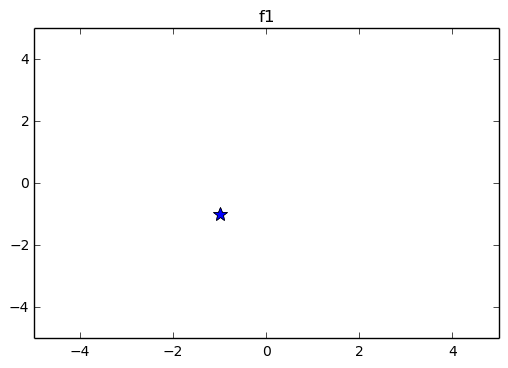

In [8]:
from plotLib import *
%matplotlib inline

level_points_plot( f1.sim , x_tab ,f1.x1_min,f1.x1_max,f1.x2_min,f1.x2_max,f1.nb_points, f1.levels , f1.title )

De même pour minimiser $f_2$ : 

> Expérimenter différents paramètres à partir de $x_0= (-1,1.2)$.

In [9]:
from plotLib import *
%matplotlib inline

import sim_f2 as f2
reload(f2)


#### Parameter we give at our algorithm
PREC    = 0.0001                     # Sought precision
ITE_MAX = 10000                      # Max number of iterations
x0      = np.array( [ -1 , 1.2] )    # Initial point
gamma   = 0.001                      # Stepsize

x,x_tab =  gradient_algorithm(f2.sim , x0 , gamma , PREC , ITE_MAX )

print(x)

importing notebook from sim_f2.ipynb
[-1.   1.2]


> Tracer les itérées sur les lignes de niveau de la fonction par la fonction `level_points_plot`.

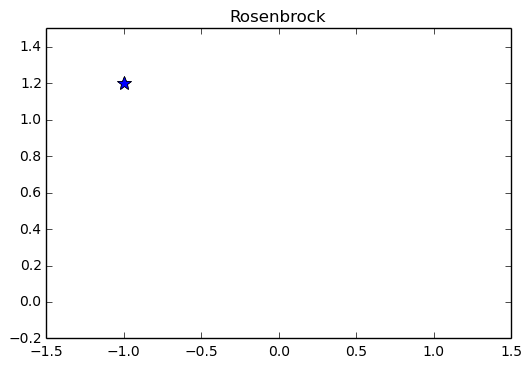

In [10]:
from plotLib import *
%matplotlib inline

level_points_plot( f2.sim , x_tab ,f2.x1_min,f2.x1_max,f2.x2_min,f2.x2_max,f2.nb_points, f2.levels , f2.title )

## Exercice 4. Recherche linéaire

La question précendente montre la difficulté de choisir un bon pas de descente. 

Une manière de choisir un pas $\gamma$ satisfaisant est de tester différents pas en appellant plusieurs fois le simulateur. Cette procédure s'appelle recherche linéaire ; la recherche linéaire de Wolfe est implémentée dans la fonction `Wolfe_line_search`  fournie dans la bibliothèque `custom_optim` ci-jointe.

**`function`** *Wolfe_line_search(sim,xk,pk)* 
* Input:
    * `sim` a function simulator
    * `xk` the current point
    * `pk` the current descent direction
* Output:
    * `alpha` an admissible stepsize satisfying Wolfe conditions (`double`) or `None` if the method did not converge 

**Méthode de Wolfe.** Soit un point $x$, une direction de descente $d$, et $q(t)=f(x+\gamma d)$. La recherche linéaire de Wolfe consiste à decider que
* $\gamma$ est satisfaisant si $q(t)\leq q(0)+m_1 \gamma q'(0)$ et $q'(t)\geq m_2 q'(0)$;
* $\gamma$ est trop grand si $q(t) > q(0)+m_1 \gamma q'(0)$;
* $\gamma$ est trop petit si $q(t)\leq q(0)+m_1 \gamma q'(0)$ et $q'(t)<m_2 q'(0)$;

pour deux constantes $0<m_1<m_2<1$, par exemple : $m1 = 0.1, m2 = 0.9$.



> Ecrire un algorithme de gradient avec cette recherche linéaire. Le tester sur $f_2$.

In [11]:
import custom_optim
reload(custom_optim)
from custom_optim import Wolfe_line_search


import numpy as np
import timeit

def gradient_ls(sim , x0 , PREC , ITE_MAX ):
    x = np.copy(x0)
    x_tab = np.copy(x)
    f,g =  sim(x0)
    ####################
    # A COMPLETER
    
    x_tab = np.vstack((x_tab,x)) # you may build x_tab by stacking vertically current x values
    
    ####################
    return x,x_tab

In [12]:
from plotLib import *
%matplotlib inline

import sim_f2 as f2
reload(f2)


#### Parameter we give at our algorithm
PREC    = 0.0001                     # Sought precision
ITE_MAX = 10000                      # Max number of iterations
x0      = np.array( [ -1 , 1.2] )    # Initial point
gamma   = 0.001                      # Stepsize

x,x_tab =  gradient_ls(f2.sim , x0 , PREC , ITE_MAX )

print(x)

importing notebook from sim_f2.ipynb
[-1.   1.2]


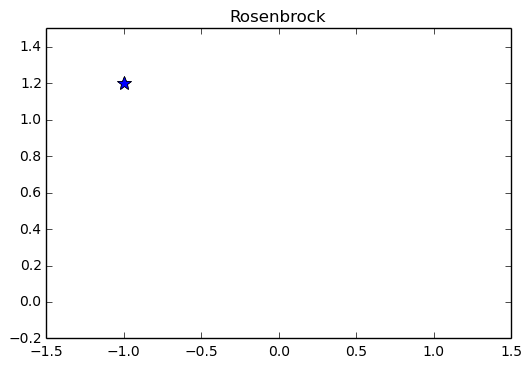

In [13]:
import plotLib
reload(plotLib)
from plotLib import *
%matplotlib inline

level_points_plot( f2.sim , x_tab ,f2.x1_min,f2.x1_max,f2.x2_min,f2.x2_max,f2.nb_points, f2.levels , f2.title )

## Exercice 5. Quasi Newton

Nous avons maintenant une méthode pour choisir un bon pas, nous allons à présent calculer une bonne direction.

Pour une fonction $f$ differentiable, les méthodes de Quasi-Newton construisent successivement une approximation $W_k$ de l'inverse de la Hessienne de la fonction et utilisent la direction $-W_k\nabla f(x_k)$.

**BFGS.** (Broyden-Fletcher-Goldfarb-Shanno, 1970) L'algorithme BFGS consiste à réaliser l'itération
$$ x_{k+1}=x_k - \gamma_k W_k \nabla f(x_k)$$
où $\gamma_k$ est donné par la recherche linéaire de Wolfe et la matrice symmétrique définie positive $W_k$ est
 calculée par la formule de récurrence
$$ W_{k+1}=W_k - \frac{s_k y_k^T W_k+W_k y_k s_k^T}{y_k^T s_k} +\left[1+\frac{y_k^T W_k y_k}{y_k^T s_k}\right]\frac{s_k s_k^T}{y_k^T s_k} $$
avec $s_k=x_{k+1}-x_{k}$ et $y_k=\nabla f(x_{k+1}) - \nabla f(x_{k})$.

Le schéma général d'une méthode de quasi-Newton est alors :
* avec l'itéré initial $x_0$, se donner une matrice initiale $W_0$ symétrique définie positive;
* connaissant le gradient $\nabla f(x_k)$, calculer la direction $d_k=-W_k \nabla f(x_k)$;
* calculer le pas $\gamma_k$ par recherche linéaire de Wolfe;
* connaissant le nouvel itéré $x_{k+1}$, appeler le simulateur et calculer la nouvelle matrice $W_{k+1}$.

> Implémenter la méthode BFGS et la tester sur la fonction $f_2$.

*Indication: utiliser la fonction `np.outer(a,b)` to compute $ab^T$.*


In [14]:
import custom_optim
reload(custom_optim)
from custom_optim import Wolfe_line_search


import numpy as np
import timeit

def bfgs(sim , x0 , PREC , ITE_MAX ):
    x = np.copy(x0)
    x_tab = np.copy(x)
    f,g =  sim(x0)
    ####################
    # A COMPLETER
    
    x_tab = np.vstack((x_tab,x)) # you may build x_tab by stacking vertically current x values
    
    ####################
    return x,x_tab

In [15]:
import sim_f2 as f2
reload(f2)


#### Parameter we give at our algorithm
PREC    = 1e-6                    # Sought precision
ITE_MAX = 10000                      # Max number of iterations
x0      = np.array( [ -1 , 1.2] )    # Initial point

x,x_tab =  bfgs(f2.sim , x0 , PREC , ITE_MAX )

importing notebook from sim_f2.ipynb


> Tracer les itérées sur les lignes de niveau de la fonction par la fonction `level_points_plot`.

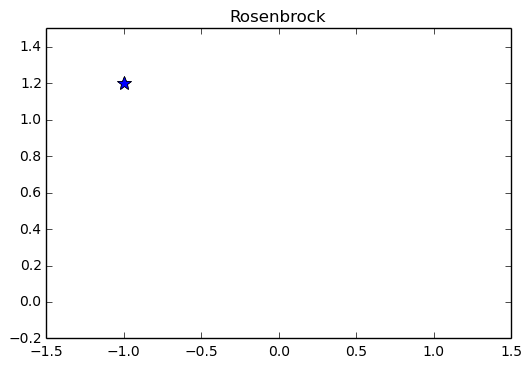

In [16]:
import plotLib
reload(plotLib)
from plotLib import *
%matplotlib inline

level_points_plot( f2.sim , x_tab ,f2.x1_min,f2.x1_max,f2.x2_min,f2.x2_max,f2.nb_points, f2.levels , f2.title )

## Bonus: Newton

> Créer dans les fichiers `sim_f1.ipynb` et `sim_f2.ipynb` un nouveau simulateur retournant également la Hessienne des fonctions respectives.
> Implémenter la méthode de Newton $$ x_{k+1} = x_k - [\nabla^2f(x_k)]^{-1} \nabla f(x_k)$$ et comparer avec Quasi-Newton.